In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [2]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Определение района и скачивание графа ---

# Указываем название района. Лучше указывать полно, чтобы OSM понял точно.
# 'place_name' может быть городом, районом, улицей и т.д.
place_name = "Бескудниковский район, Москва, Россия"

print(f"Загружаем дорожный граф для: {place_name}...")

# osmnx скачивает данные и сразу строит из них граф.
# network_type='drive' означает, что нас интересуют дороги для автомобилей.
# Другие варианты: 'walk' (пешеходные), 'bike' (вело), 'all' (все вместе).
G = ox.graph_from_place(place_name, network_type='drive')

# osmnx по умолчанию упрощает граф, оставляя только узлы-перекрестки и тупики.
# Это именно то, что нужно для транспортного моделирования.
print("Граф успешно загружен и построен!")
print(f"Количество узлов (перекрестков): {len(G.nodes)}")
print(f"Количество ребер (участков дорог): {len(G.edges)}")


# --- 2. Получение координат узлов ---

# Узлы в графе osmnx уже содержат всю необходимую информацию, включая координаты.
# Давайте извлечем их и поместим в удобную таблицу pandas.
nodes_data = []
for node, data in G.nodes(data=True):
    nodes_data.append({
        'node_id': node,
        'lat': data['y'],  # Широта
        'lon': data['x']   # Долгота
    })

# Создаем DataFrame из списка словарей
df_coords = pd.DataFrame(nodes_data)
df_coords.set_index('node_id', inplace=True) # Делаем ID узла индексом

print("\nФрагмент таблицы с координатами узлов (node_id, широта, долгота):")
print(df_coords.head())


# --- 3. Получение матрицы смежности ---

# Важно: строки и столбцы матрицы смежности будут соответствовать ID узлов 
# в том порядке, в котором они хранятся в графе. Давайте зафиксируем этот порядок.
node_ids = list(G.nodes)

# NetworkX позволяет легко получить матрицу смежности.
# По умолчанию, это будет матрица из 0 и 1 (0 - нет ребра, 1 - есть ребро).
# Она возвращается в виде разреженной матрицы Scipy для экономии памяти.
adj_matrix_sparse = nx.adjacency_matrix(G, nodelist=node_ids)

# Для небольших графов (как у одного района) ее можно превратить в обычный numpy массив.
# ВНИМАНИЕ: для графа целого города это может занять всю оперативную память!
adj_matrix_dense = adj_matrix_sparse.toarray()

print(f"\nМатрица смежности получена. Размер: {adj_matrix_dense.shape}x{adj_matrix_dense.shape}")
print("Фрагмент матрицы смежности (первые 5x5 узлов):")
print(adj_matrix_dense[:5, :5])


# --- 4. (Бонус) Визуализация графа ---

# Чтобы убедиться, что мы скачали то, что нужно, давайте нарисуем граф.
print("\nРисуем граф...")
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.5, show=False, close=True)
plt.suptitle("Дорожный граф Бескудниковского района", y=0.95, fontsize=15)
plt.show()

# --- Что в итоге у вас есть ---
# 1. df_coords: Pandas DataFrame, где индекс - это ID узла, а колонки 'lat', 'lon' - его координаты.
# 2. adj_matrix_dense: NumPy массив (матрица смежности). adj_matrix_dense[i][j] == 1, 
#    если есть дорога от узла node_ids[i] к узлу node_ids[j].
# 3. node_ids: Список ID узлов, который связывает индексы матрицы с реальными ID.


Загружаем дорожный граф для: Бескудниковский район, Москва, Россия...
Граф успешно загружен и построен!
Количество узлов (перекрестков): 72
Количество ребер (участков дорог): 142

Фрагмент таблицы с координатами узлов (node_id, широта, долгота):
                 lat        lon
node_id                        
35898438   55.863223  37.549577
35898449   55.873853  37.548031
154578339  55.873828  37.547381
247464238  55.850324  37.566467
247785995  55.854543  37.562908

Матрица смежности получена. Размер: (72, 72)x(72, 72)
Фрагмент матрицы смежности (первые 5x5 узлов):
[[0 0 0 0 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

Рисуем граф...


<Figure size 800x500 with 0 Axes>


Рисуем граф...


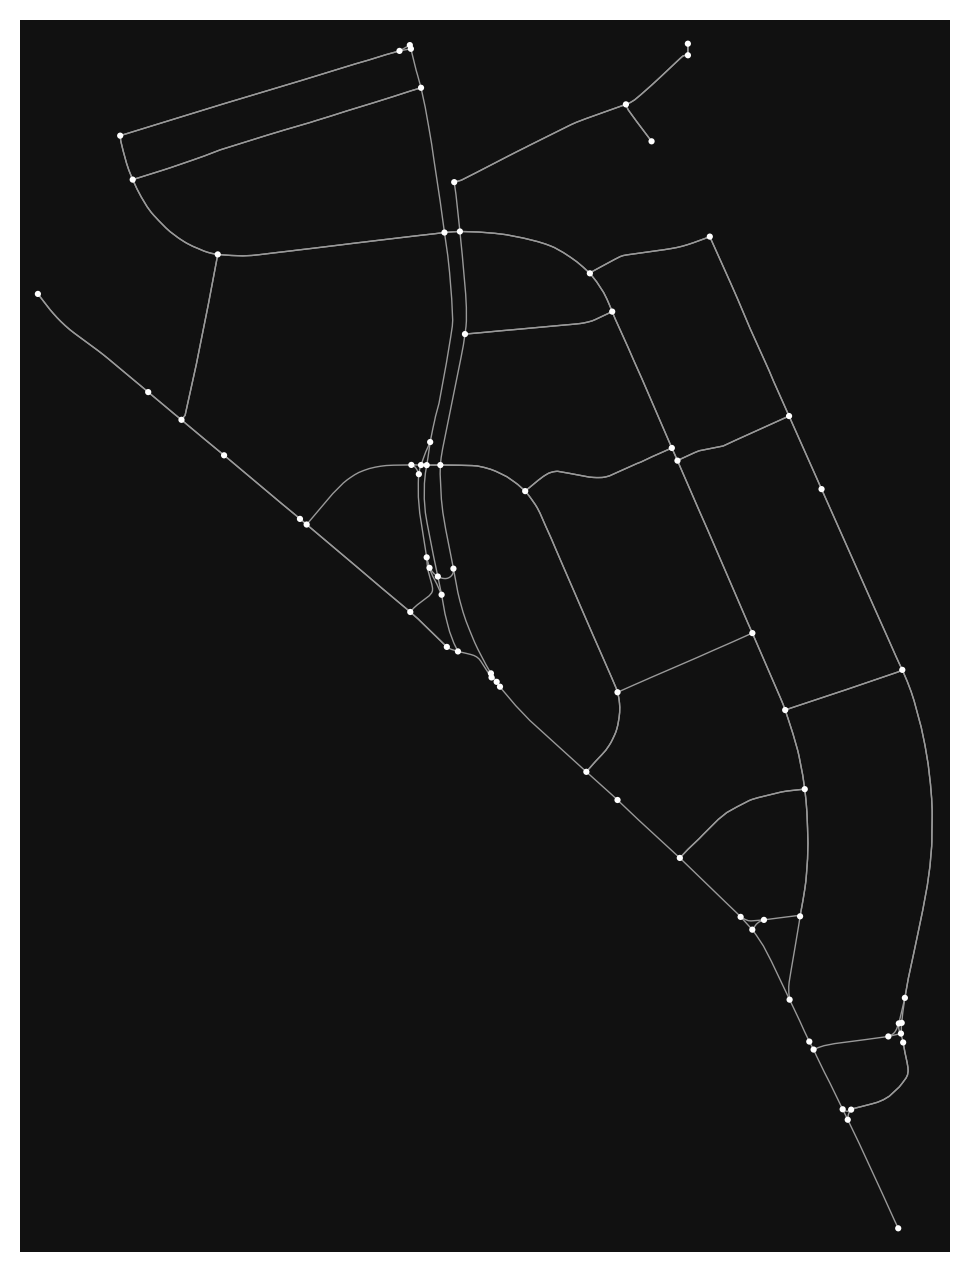

Text(0.5, 0.95, 'Дорожный граф Бескудниковского района')

<Figure size 800x500 with 0 Axes>

In [3]:
print("\nРисуем граф...")
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.5)
plt.suptitle("Дорожный граф Бескудниковского района", y=0.95, fontsize=15)

In [4]:
df_coords

,lat,lon
node_id,,
35898438,55.863223,37.549577
35898449,55.873853,37.548031
154578339,55.873828,37.547381
247464238,55.850324,37.566467
247785995,55.854543,37.562908
...,...,...
8614547339,55.865709,37.547101
9018403538,55.865913,37.546751
9785553162,55.878165,37.545969


In [33]:
a = '''_yasc	P8r+MS0pwVIKdx1u3sKbicFsyVFEInjrx4/VETR8IJ2gzyL46oVD2EtMU0QR35FdwwlGaFmylSH1Ng2elatwH3qnzQ==	.yandex.ru	/	2026-11-17T20:26:03.894Z	97		✓				Medium	
_ym_d	1756822204	.yandex.ru	/	2026-09-02T14:10:04.000Z	15		✓	None			Medium	
_ym_isad	2	.yandex.ru	/	2025-10-14T14:30:07.000Z	9		✓	None			Medium	
_ym_uid	1731927507304740982	.yandex.ru	/	2026-09-02T14:10:04.000Z	26		✓	None			Medium	
amcuid	9037145011732118542	.yandex.ru	/	2025-11-20T16:02:22.520Z	25		✓	None			Medium	
bh	Ek8iTm90KUE7QnJhbmQiO3Y9IjgiLCAiQ2hyb21pdW0iO3Y9IjEzOCIsICJZYUJyb3dzZXIiO3Y9IjI1LjgiLCAiWW93c2VyIjt2PSIyLjUiGgUiYXJtIiIMIjI1LjguMy44MzAiKgI/MDICIiI6ByJtYWNPUyJCCCIxNC4yLjEiSgQiNjQiUmYiTm90KUE7QnJhbmQiO3Y9IjguMC4wLjAiLCAiQ2hyb21pdW0iO3Y9IjEzOC4wLjcyMDQuODMwIiwgIllhQnJvd3NlciI7dj0iMjUuOC4zLjgzMCIsICJZb3dzZXIiO3Y9IjIuNSJaAj8wYOjLtccGaiPcytG2Abvxn6sE+taGzAjS0e3rA/y5r/8H3/2r0AbCj82HCA==	.yandex.ru	/	2026-11-17T20:49:44.000Z	386		✓	None			Medium	
Cookie_check	1	.yandex.ru	/	Session	13						Medium	
cycada	s4q3t2FIdIvMTHfm+OeQKEFTCXae1NmdIFruzgsr0AI=	.yandex.ru	/	2025-10-27T20:21:46.000Z	50		✓	None			Medium	
font_loaded	YSv1	.yandex.ru	/	2025-11-18T10:58:29.033Z	15						Medium	
gdpr	0	.yandex.ru	/	2026-10-13T20:49:43.000Z	5		✓	None			Medium	
i	6H4NbHXJFpaJqamUXZjpV3KR0cPNI/JVSttzlful1208IASOKOuUOoPesC7uMDHjTjdD9OLEIHchfqGE3J4OX7RvFo0=	.yandex.ru	/	2026-11-17T18:27:44.732Z	93	✓	✓	None			Medium	
is_gdpr	0	.yandex.net	/	2025-12-25T08:12:52.495Z	8		✓	None			Medium	
is_gdpr	0	.yandex.ru	/	2026-10-18T09:40:19.653Z	8		✓	None			Medium	
is_gdpr_b	CNa0CBDDnwI=	.yandex.net	/	2025-12-25T08:12:52.495Z	21		✓	None			Medium	
is_gdpr_b	CJzWUhCc1wIoAg==	.yandex.ru	/	2026-10-18T09:40:19.653Z	25		✓	None			Medium	
isa	IEDw+/HMlotp4AHWvhh3QaTVp6F4wF85NdMaNqpg8AM+NFtzpAJIcbxWhMTp+z3xAnj9GOWyUufXNHgsxM6qd/fUcMM=	.yandex.ru	/	Session	95		✓	None			Medium	
L	SSR1AVtneHkJfFZ1fk1YcGVSbnxaUnh4GzAIJw88AB4TX1I1Cx8qOBo9ESImTQANJA==.1731927581.15955.320579.a08ee4192480e4889cbff47fe7b94fda	.yandex.ru	/	2025-12-23T10:59:41.344Z	126						Medium	
lah	2:1823460583.11292198.QH1Eq2Yr3hX9jK1g.iMlyfl9WfM42Zc1c583OBme9qWkgXoUx-n9aVfvul91b_UPVJL0jN2au22uf-tYoEbXjyqkypfK5BW0PV6IbMQ.KVuViCQ2cyS-b5EtKyxpBA	.passport.yandex.ru	/	2026-11-17T20:49:43.243Z	151	✓	✓	None			Medium	
maps_routes_travel_mode	auto	yandex.ru	/	2026-10-13T20:26:07.000Z	27						Medium	
maps_session_id	1760387194427305-6435074654832260614-balancer-l7leveler-kubr-yp-sas-243-BAL	.yandex.ru	/	Session	90						Medium	
mda2_beacon	1760388583237	.passport.yandex.ru	/	2026-11-17T20:49:43.243Z	24		✓	None			Medium	
mda2_domains	dzen.ru,ya.ru,yandex.cloud	.passport.yandex.ru	/	2026-11-16T16:20:18.627Z	38		✓				Medium	
my	Yy4BAQA=	.yandex.ru	/	2026-06-24T08:02:32.183Z	10		✓	None			Medium	
sae	0:6D2730C2-0A83-448E-848D-51327A997446:p:25.8.3.830:m:d:EN-US:20241118	.yandex.ru	/	Session	73		✓	None			Medium	
sc_1760388584044	fake_useragent%20conda:anaconda.org:%2Fsearch%2F:1760388582611227-10900816689341397806-balancer-l7leveler-kubr-yp-klg-299-BAL	.yandex.ru	/watch	2025-10-13T20:59:44.000Z	141		✓	None			Medium	
sessar	1.1193492.CiCj08FsGItgN3Pey4wF3Eu20ZUADaaFsid5x0JQ1UHouQ.p9HxDlrTFNnN0V9uSg0XEQCeLJNUxHP-YMcGjoS57mw	.yandex.ru	/	2026-11-17T20:49:43.243Z	106	✓	✓	None			Medium'''

In [35]:
cookie = []
for elem in a.split('\n'):
    kek = elem.split('\t')
    # print(elem)
    cookie.append(kek[0] + '=' + kek[1])
cookie = '; '.join(cookie)
cookie

'_yasc=P8r+MS0pwVIKdx1u3sKbicFsyVFEInjrx4/VETR8IJ2gzyL46oVD2EtMU0QR35FdwwlGaFmylSH1Ng2elatwH3qnzQ==; _ym_d=1756822204; _ym_isad=2; _ym_uid=1731927507304740982; amcuid=9037145011732118542; bh=Ek8iTm90KUE7QnJhbmQiO3Y9IjgiLCAiQ2hyb21pdW0iO3Y9IjEzOCIsICJZYUJyb3dzZXIiO3Y9IjI1LjgiLCAiWW93c2VyIjt2PSIyLjUiGgUiYXJtIiIMIjI1LjguMy44MzAiKgI/MDICIiI6ByJtYWNPUyJCCCIxNC4yLjEiSgQiNjQiUmYiTm90KUE7QnJhbmQiO3Y9IjguMC4wLjAiLCAiQ2hyb21pdW0iO3Y9IjEzOC4wLjcyMDQuODMwIiwgIllhQnJvd3NlciI7dj0iMjUuOC4zLjgzMCIsICJZb3dzZXIiO3Y9IjIuNSJaAj8wYOjLtccGaiPcytG2Abvxn6sE+taGzAjS0e3rA/y5r/8H3/2r0AbCj82HCA==; Cookie_check=1; cycada=s4q3t2FIdIvMTHfm+OeQKEFTCXae1NmdIFruzgsr0AI=; font_loaded=YSv1; gdpr=0; i=6H4NbHXJFpaJqamUXZjpV3KR0cPNI/JVSttzlful1208IASOKOuUOoPesC7uMDHjTjdD9OLEIHchfqGE3J4OX7RvFo0=; is_gdpr=0; is_gdpr=0; is_gdpr_b=CNa0CBDDnwI=; is_gdpr_b=CJzWUhCc1wIoAg==; isa=IEDw+/HMlotp4AHWvhh3QaTVp6F4wF85NdMaNqpg8AM+NFtzpAJIcbxWhMTp+z3xAnj9GOWyUufXNHgsxM6qd/fUcMM=; L=SSR1AVtneHkJfFZ1fk1YcGVSbnxaUnh4GzAIJw88AB4TX1I1Cx8qOBo9ES

In [39]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent


def get_travel_time(
    from_lat: float,
    from_lon: float, 
    to_lat: float,
    to_lon: float,
) -> int:
    params = {
        'll': '37.343740,55.905379',
        'mode': 'routes',
        'rtext': f'{from_lat:.6f},{from_lon:.6f}~{to_lat:.6f},{to_lon:.6f}',
        'rtt': 'auto',
        'ruri': '~',
        'z': '16.07'
    }

    response = requests.get('https://yandex.ru/maps/213/moscow/', params=params, headers={'User-Agent': UserAgent().firefox, 'Cookie': cookie})
    if response.status_code != 200:
        raise RuntimeError(f'Response status: {response.status_code}')
    
    soup = BeautifulSoup(response.content, 'html.parser')
    duration_div = soup.find('div', class_='auto-route-snippet-view__duration')
    
    if duration_div:
        # Нормализуем текст, заменяя неразрывные пробелы на обычные
        duration_text = duration_div.text.replace('\xa0', ' ')
        
        # Разбиваем строку на части
        parts = duration_text.split()
        
        total_minutes = 0
        
        # Проходим по частям строки парами (число и единица измерения)
        for i in range(0, len(parts), 2):
            value = int(parts[i])
            unit = parts[i + 1]
            
            if 'ч' in unit:
                total_minutes += value * 60
            elif 'мин' in unit:
                total_minutes += value
                
        return total_minutes
    print(response.content.decode('utf-8'))
    raise RuntimeError(f'No route duration found!')

In [40]:
get_travel_time(
    55.863223, 37.549577, 55.873853, 37.548031
)

2

In [41]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm # для красивого прогресс-бара

# Загружаем граф, как в прошлый раз
place_name = "Бескудниковский район, Москва, Россия"
G = ox.graph_from_place(place_name, network_type='drive')
print("Граф загружен.")

# Проходим по каждому ребру в графе
print("Рассчитываем время поездки для каждого ребра...")
for u, v, key, data in tqdm(G.edges(keys=True, data=True), total=G.number_of_edges()):
    # u - id начального узла
    # v - id конечного узла
    # data - словарь с атрибутами ребра
    
    # Получаем координаты начальной и конечной точек
    from_lat = G.nodes[u]['y']
    from_lon = G.nodes[u]['x']
    to_lat = G.nodes[v]['y']
    to_lon = G.nodes[v]['x']
    
    # Вызываем вашу функцию для расчета времени
    # ВАЖНО: здесь используется get_travel_time, которую вы должны определить сами.
    # Сейчас она заменена на get_travel_time_mock
    time_minutes = get_travel_time(from_lat=from_lat, from_lon=from_lon, to_lat=to_lat, to_lon=to_lon)
    print(time_minutes)
    # Добавляем новый атрибут 'travel_time' к ребру
    G[u][v][key]['travel_time'] = time_minutes

print("Расчет времени завершен. Атрибут 'travel_time' добавлен к ребрам.")


Граф загружен.
Рассчитываем время поездки для каждого ребра...


  1%|          | 1/142 [00:00<00:47,  2.99it/s]

1


  1%|▏         | 2/142 [00:00<00:36,  3.79it/s]

3


  2%|▏         | 3/142 [00:00<00:39,  3.48it/s]

3


  3%|▎         | 4/142 [00:01<00:37,  3.72it/s]

1


  4%|▍         | 6/142 [00:01<00:32,  4.20it/s]

1
2


  6%|▌         | 8/142 [00:01<00:29,  4.60it/s]

1
1


  6%|▋         | 9/142 [00:02<00:28,  4.68it/s]

1


  7%|▋         | 10/142 [00:02<00:27,  4.75it/s]

1


  8%|▊         | 11/142 [00:02<00:28,  4.55it/s]

3


  8%|▊         | 12/142 [00:02<00:29,  4.39it/s]

5


  9%|▉         | 13/142 [00:03<00:36,  3.52it/s]

1


 10%|▉         | 14/142 [00:03<00:34,  3.69it/s]

1


 11%|█         | 15/142 [00:03<00:33,  3.81it/s]

1


 11%|█▏        | 16/142 [00:04<00:48,  2.59it/s]

2
1


 13%|█▎        | 18/142 [00:04<00:38,  3.25it/s]

1


 13%|█▎        | 19/142 [00:05<00:34,  3.60it/s]

1


 14%|█▍        | 20/142 [00:05<00:32,  3.80it/s]

3


 15%|█▍        | 21/142 [00:05<00:29,  4.09it/s]

2


 15%|█▌        | 22/142 [00:05<00:28,  4.22it/s]

1


 16%|█▌        | 23/142 [00:05<00:27,  4.29it/s]

4


 18%|█▊        | 25/142 [00:06<00:28,  4.11it/s]

1
3


 18%|█▊        | 26/142 [00:06<00:27,  4.21it/s]

2
4


 20%|█▉        | 28/142 [00:07<00:24,  4.59it/s]

1


 21%|██        | 30/142 [00:07<00:22,  4.91it/s]

1
1


 23%|██▎       | 32/142 [00:07<00:24,  4.52it/s]

2
3


 23%|██▎       | 33/142 [00:08<00:23,  4.67it/s]

1


 25%|██▍       | 35/142 [00:08<00:21,  4.87it/s]

1
2


 25%|██▌       | 36/142 [00:08<00:21,  4.88it/s]

3


 27%|██▋       | 38/142 [00:09<00:21,  4.91it/s]

4
1


 27%|██▋       | 39/142 [00:09<00:20,  5.02it/s]

1


 29%|██▉       | 41/142 [00:09<00:20,  4.97it/s]

2
2


 30%|██▉       | 42/142 [00:10<00:20,  4.85it/s]

4


 31%|███       | 44/142 [00:10<00:20,  4.71it/s]

3
1


 32%|███▏      | 45/142 [00:10<00:20,  4.84it/s]

1


 32%|███▏      | 46/142 [00:11<00:27,  3.53it/s]

1


 33%|███▎      | 47/142 [00:11<00:24,  3.81it/s]

1


 34%|███▍      | 48/142 [00:11<00:23,  4.04it/s]

2


 35%|███▌      | 50/142 [00:11<00:20,  4.54it/s]

1
1


 37%|███▋      | 52/142 [00:12<00:18,  4.79it/s]

1
1


 37%|███▋      | 53/142 [00:12<00:17,  5.01it/s]

1


 39%|███▊      | 55/142 [00:12<00:18,  4.63it/s]

1
4


 39%|███▉      | 56/142 [00:13<00:18,  4.57it/s]

4


 40%|████      | 57/142 [00:13<00:18,  4.62it/s]

1


 42%|████▏     | 59/142 [00:13<00:16,  4.89it/s]

1
3


 42%|████▏     | 60/142 [00:14<00:16,  4.84it/s]

3


 44%|████▎     | 62/142 [00:14<00:16,  4.86it/s]

1
1


 45%|████▌     | 64/142 [00:14<00:16,  4.76it/s]

2
2


 46%|████▌     | 65/142 [00:15<00:16,  4.75it/s]

3


 46%|████▋     | 66/142 [00:15<00:16,  4.74it/s]

3


 48%|████▊     | 68/142 [00:15<00:15,  4.86it/s]

3
5


 49%|████▉     | 70/142 [00:16<00:14,  4.86it/s]

2
1


 51%|█████     | 72/142 [00:16<00:16,  4.30it/s]

2
1


 51%|█████▏    | 73/142 [00:16<00:15,  4.43it/s]

3


 53%|█████▎    | 75/142 [00:17<00:14,  4.63it/s]

3
4


 54%|█████▍    | 77/142 [00:17<00:13,  4.87it/s]

1
1


 55%|█████▍    | 78/142 [00:17<00:13,  4.85it/s]

4


 56%|█████▌    | 79/142 [00:18<00:13,  4.72it/s]

4


 56%|█████▋    | 80/142 [00:18<00:13,  4.63it/s]

1


 57%|█████▋    | 81/142 [00:18<00:13,  4.51it/s]

1


 58%|█████▊    | 82/142 [00:18<00:13,  4.46it/s]

1


 59%|█████▉    | 84/142 [00:19<00:12,  4.65it/s]

2
1


 60%|█████▉    | 85/142 [00:19<00:12,  4.58it/s]

1


 61%|██████▏   | 87/142 [00:19<00:11,  4.84it/s]

1
2


 62%|██████▏   | 88/142 [00:20<00:11,  4.75it/s]

4
1


 63%|██████▎   | 90/142 [00:20<00:10,  4.91it/s]

1


 64%|██████▍   | 91/142 [00:20<00:10,  4.77it/s]

4


 65%|██████▍   | 92/142 [00:20<00:10,  4.77it/s]

1


 66%|██████▌   | 94/142 [00:21<00:10,  4.77it/s]

3
1


 67%|██████▋   | 95/142 [00:21<00:12,  3.80it/s]

1


 68%|██████▊   | 96/142 [00:22<00:12,  3.62it/s]

3


 69%|██████▉   | 98/142 [00:22<00:11,  3.76it/s]

1
1


 70%|██████▉   | 99/142 [00:22<00:10,  4.11it/s]

3


 71%|███████   | 101/142 [00:23<00:08,  4.60it/s]

2
1


 73%|███████▎  | 103/142 [00:23<00:09,  4.01it/s]

2
1


 74%|███████▍  | 105/142 [00:24<00:08,  4.53it/s]

2
1


 75%|███████▌  | 107/142 [00:24<00:07,  4.77it/s]

3
1


 76%|███████▌  | 108/142 [00:24<00:06,  4.93it/s]

2


 77%|███████▋  | 109/142 [00:24<00:06,  4.77it/s]

3


 77%|███████▋  | 110/142 [00:25<00:07,  4.53it/s]

1


 78%|███████▊  | 111/142 [00:25<00:06,  4.53it/s]

1


 79%|███████▉  | 112/142 [00:25<00:06,  4.48it/s]

2


 80%|████████  | 114/142 [00:26<00:05,  4.67it/s]

3
6


 81%|████████  | 115/142 [00:26<00:05,  4.55it/s]

4


 82%|████████▏ | 116/142 [00:26<00:05,  4.66it/s]

1


 83%|████████▎ | 118/142 [00:26<00:04,  4.90it/s]

1
1


 84%|████████▍ | 119/142 [00:27<00:04,  4.98it/s]

1


 85%|████████▌ | 121/142 [00:27<00:04,  4.96it/s]

1
1


 86%|████████▌ | 122/142 [00:27<00:04,  4.92it/s]

1


 87%|████████▋ | 123/142 [00:27<00:03,  4.82it/s]

1
1


 88%|████████▊ | 125/142 [00:28<00:03,  5.04it/s]

3


 89%|████████▊ | 126/142 [00:28<00:04,  3.43it/s]

1


 89%|████████▉ | 127/142 [00:29<00:04,  3.65it/s]

1


 90%|█████████ | 128/142 [00:29<00:03,  3.57it/s]

1


 91%|█████████ | 129/142 [00:29<00:03,  3.65it/s]

1


 92%|█████████▏| 130/142 [00:29<00:03,  3.39it/s]

2


 92%|█████████▏| 131/142 [00:30<00:02,  3.68it/s]

1


 94%|█████████▎| 133/142 [00:30<00:02,  4.19it/s]

2
1


 94%|█████████▍| 134/142 [00:30<00:01,  4.33it/s]

2


 96%|█████████▌| 136/142 [00:31<00:01,  4.65it/s]

1
1


 96%|█████████▋| 137/142 [00:31<00:01,  4.65it/s]

1


 97%|█████████▋| 138/142 [00:31<00:00,  4.71it/s]

1


 99%|█████████▊| 140/142 [00:32<00:00,  4.70it/s]

1
1


 99%|█████████▉| 141/142 [00:32<00:00,  4.23it/s]

1


100%|██████████| 142/142 [00:32<00:00,  4.35it/s]

1
Расчет времени завершен. Атрибут 'travel_time' добавлен к ребрам.



Рисуем граф с тепловой картой времени...


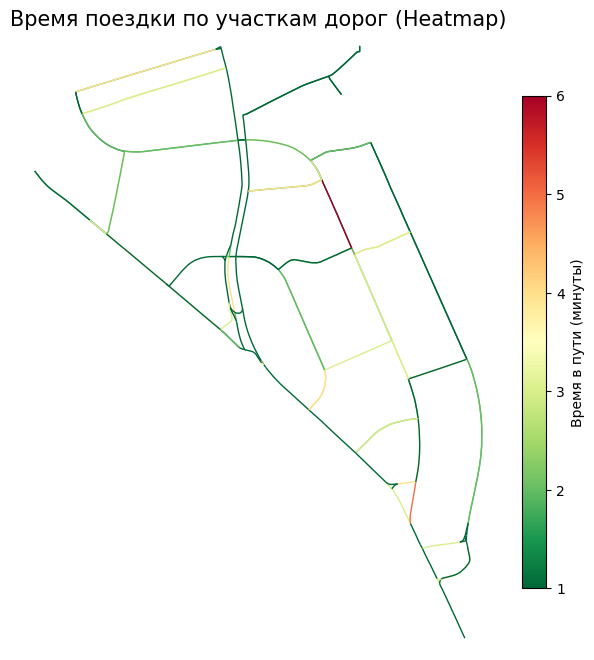

In [46]:
# --- Метод 1: Визуализация с помощью Heatmap ---

# Получаем список времен поездки для всех ребер
edge_travel_times = []
for u, v, key, data in G.edges(keys=True, data=True):
    edge_travel_times.append(data['travel_time'])

# Выбираем цветовую карту (например, 'viridis', 'plasma', 'coolwarm' или 'RdYlGn_r')
# '_r' в конце инвертирует карту, так что красный будет для долгих поездок
cmap = plt.get_cmap('RdYlGn_r') 

# Находим минимальное и максимальное время для нормализации цветов
min_time = min(edge_travel_times)
max_time = max(edge_travel_times)
norm = plt.Normalize(vmin=min_time, vmax=max_time)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# Создаем список цветов для каждого ребра
edge_colors = [sm.to_rgba(time) for time in edge_travel_times]

print("\nРисуем граф с тепловой картой времени...")
# Рисуем граф, передавая список цветов ребер
fig, ax = ox.plot_graph(
    G, 
    edge_color=edge_colors, 
    node_size=0, 
    edge_linewidth=1.0, 
    bgcolor='w',
    show=False, 
    close=False
)

# Добавляем colorbar (шкалу соответствия цвета и времени)
cbar = fig.colorbar(sm, ax=ax, shrink=0.8)
cbar.set_label('Время в пути (минуты)')

ax.set_title("Время поездки по участкам дорог (Heatmap)", fontsize=15)
plt.show()



Рисуем граф с подписями времени (может быть нечитаемо)...


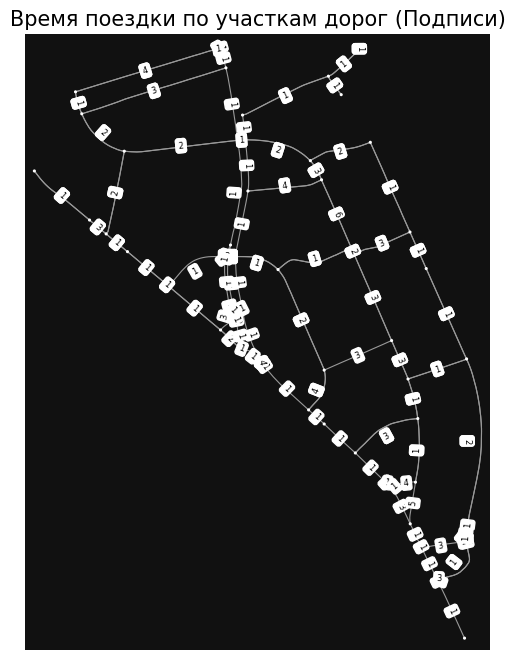

In [47]:
# --- Метод 2: Визуализация с помощью подписей ---

# Для этого метода нужно явно задать позиции узлов
pos = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

# Создаем словарь с подписями для ребер
edge_labels = {}
for u, v, data in G.edges(data=True):
    # Чтобы подписи не накладывались, округляем до целых
    label = f"{data['travel_time']:.0f}"
    edge_labels[(u, v)] = label
    
print("\nРисуем граф с подписями времени (может быть нечитаемо)...")
# Сначала рисуем сам граф без подписей
fig, ax = ox.plot_graph(G, node_size=5, edge_linewidth=0.8, show=False, close=False)

# Затем поверх него рисуем подписи
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=6, ax=ax)

ax.set_title("Время поездки по участкам дорог (Подписи)", fontsize=15)
plt.show()


- хочу сжать ребра в графе, которые идут подряд
- уменьшить число рёбер

План работы над проектом
- сделать репо
- созвониться с руководителем проекта
    - сделать список вопросов. В частности, не будет ли проблем с оценкой
- сделать описание проекта с целями и задачами. Можно попросить GPT сгенерировать по SMART
- писать отчёты о проделанный работе и описания решений. Можно предложить два подхода к созданию датасета: от яндекса и от франции
- сначала поискать опенсорсные датасеты
    - [спросил](https://ai.yandex-team.ru/t/7ca37b73-842f-4b3b-80df-7da546346e4c) у gemini про датасеты - выдала список